Name : Aman Shrestha
<br>
ID : 2408222

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Classification Task

Health care: Heart attack possibility

The dataset was uploaded to Kaggle on 2020 by the user Naresh Bhat.

This dataset directly aligns with UNSDG 3: Good Health and Well-being.


 Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0= less chance of heart attack 1= more chance of heart attack


This dataset could help answer :

"What are the key factors influencing the likelihood of a heart attack, and how can predictive models be utilized to improve early detection and prevention strategies?"

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Concepts of Technology of AI/final assessment/heart.csv')

In [ ]:
print("Dataset Shape:", df.shape)
print("Dataset Information:")
print(df.info())

Dataset Shape: (303, 14)
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std    

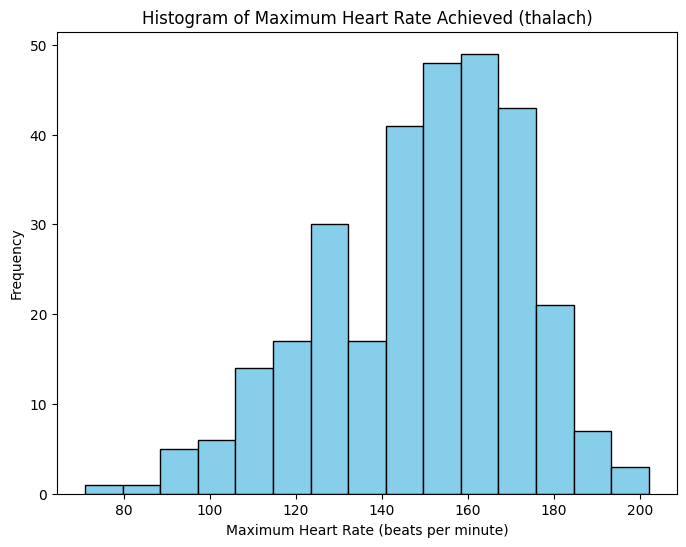

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['thalach'], bins=15, color='skyblue', edgecolor='black')
plt.title("Histogram of Maximum Heart Rate Achieved (thalach)")
plt.xlabel("Maximum Heart Rate (beats per minute)")
plt.ylabel("Frequency")
plt.show()

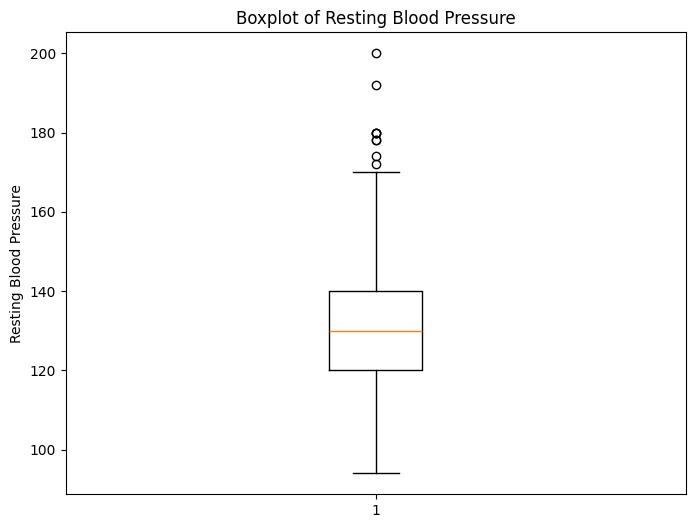

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot(df['trestbps'])
plt.title("Boxplot of Resting Blood Pressure")
plt.ylabel("Resting Blood Pressure")
plt.show()

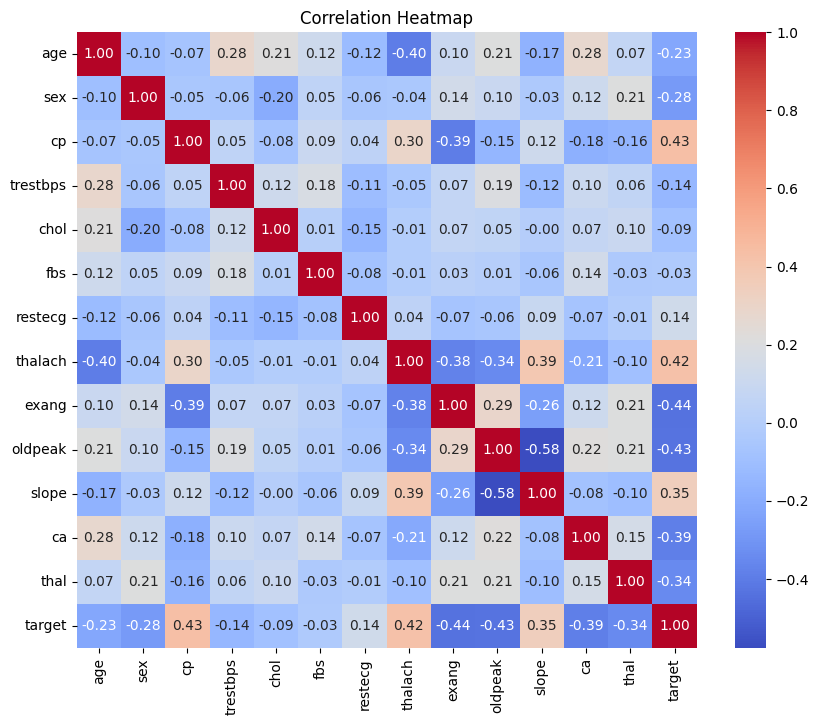

In [ ]:
# (e) Correlation Heatmap among Numeric Attributes
plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# Insight: The heatmap reveals the pairwise correlations between variables.

Model from Scratch

In [ ]:
def logistic_function(x):
  y = 1/(1 + np.exp(-x))
  return y

In [ ]:
def log_loss(y_true, y_pred):
  # Ensure y_pred is clipped to avoid log(0)
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  loss = -(y_true * np.log(y_pred)) - ((1-y_true) * np.log(1- y_pred))
  return loss

In [ ]:
def cost_function(y_true, y_pred):
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)
    loss_vec = np.array([log_loss(y_true[i], y_pred[i]) for i in range(n)])
    cost = np.dot(loss_vec, np.ones(n)) / n
    return cost

In [ ]:
def costfunction_logreg(X, y, w, b):
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    z = np.dot(X, w) + b

    y_pred = logistic_function(z)

    cost = cost_function(y, y_pred)

    return cost

In [ ]:
def compute_gradient(X, y, w, b):
    n, d = X.shape
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    y_pred = logistic_function(np.dot(X, w) + b)

    # Compute gradients
    grad_w = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.dot(np.ones(n), (y_pred - y)) / n

    return grad_w, grad_b

In [ ]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)

        w -= alpha * grad_w
        b -= alpha * grad_b

        cost = costfunction_logreg(X, y, w, b)

        cost_history.append(cost)
        params_history.append((w.copy(), b))

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


In [ ]:
def prediction(X, w, b, threshold=0.5):
    y_test_prob = logistic_function(np.dot(X, w) + b)

    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred

In [ ]:
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    precision = float(precision)
    recall = float(recall)
    f1_score = float(f1_score)

    return confusion_matrix, precision, recall, f1_score

In [ ]:
x = df.drop(columns=['target']).values
y = df['target'].values
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
w = np.zeros(x_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

In [ ]:
w,b,cost_history,params_history = gradient_descent(x_train_scaled,y_train,w,b,alpha,n_iter,show_cost=True,show_params=False)

Iteration 0: Cost = 0.659463
Iteration 100: Cost = 0.351645
Iteration 200: Cost = 0.342807
Iteration 300: Cost = 0.340721
Iteration 400: Cost = 0.340004
Iteration 500: Cost = 0.339712
Iteration 600: Cost = 0.339583
Iteration 700: Cost = 0.339522
Iteration 800: Cost = 0.339493
Iteration 900: Cost = 0.339479
Iteration 999: Cost = 0.339472


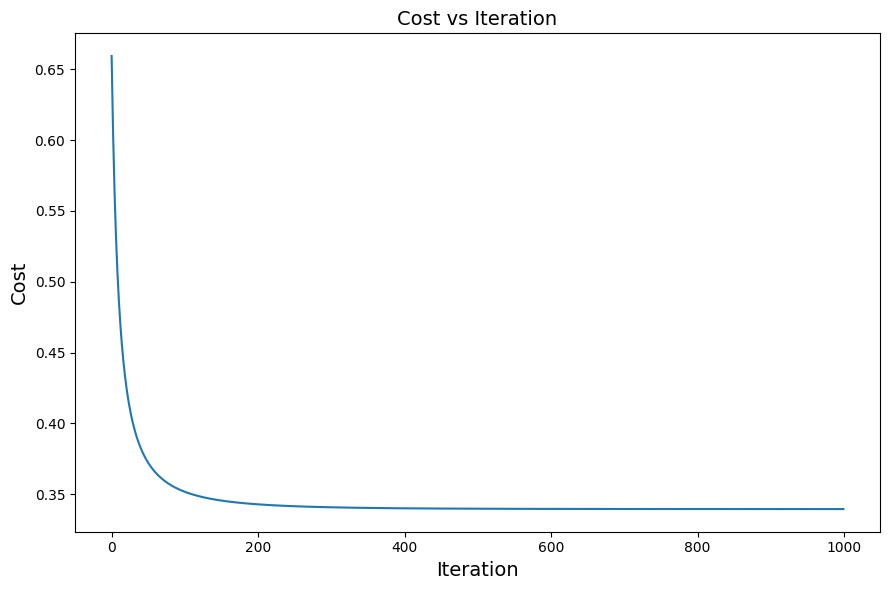

In [ ]:
plt.figure(figsize = (9,6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
y_train_pred = prediction(x_train_scaled, w, b)
y_test_pred = prediction(x_test_scaled, w, b)

In [ ]:
train_cost = costfunction_logreg(x_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(x_test_scaled, y_test, w, b)
print(f"Train Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")

Train Loss (Cost): 0.3395
Test Loss (Cost): 0.4458


In [ ]:
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Test Accuracy: 80.33%

Confusion Matrix:
[[19  9]
 [ 3 30]]
Precision: 0.77
Recall: 0.91
F1-Score: 0.83


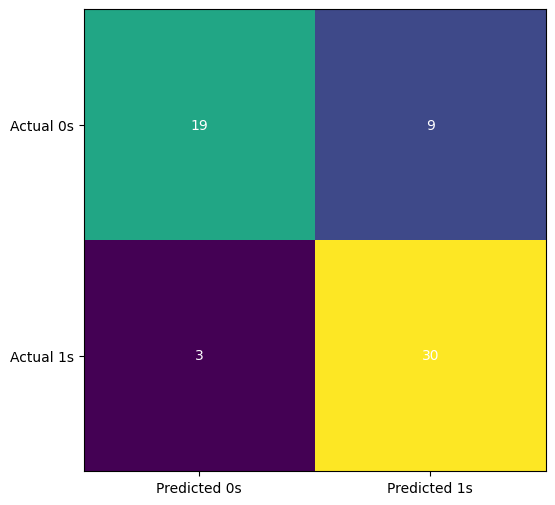

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')
plt.show()

Primary Model

Logistic Regression from sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred = logistic_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8032786885245902
Confusion Matrix:
[[19  9]
 [ 3 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



Random Forest Classifier from sklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Concepts of Technology of AI/final assessment/heart.csv')
x = df.drop(columns=['target']).values
y = df['target'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_forest_model.predict(x_test_scaled)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", confusion)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Confusion Matrix:
 [[24  5]
 [ 5 27]]
Precision: 0.8438
Recall: 0.8438
F1-score: 0.8438
Accuracy: 0.8361


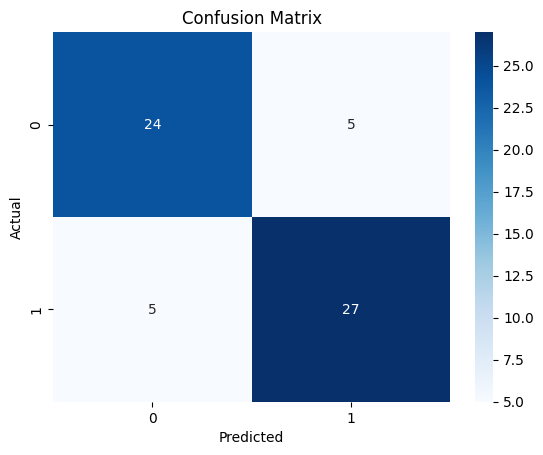

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Hyper-parameter Optimization with Cross-Validation

Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logistic_regression_model = LogisticRegression(max_iter=2000)

grid_search_lr = GridSearchCV(estimator=logistic_regression_model,
                           param_grid=param_grid_lr,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search_lr.fit(x_train, y_train)

print("Best Hyperparameters (Logistic Regression):", grid_search_lr.best_params_)
print("Best Score (Logistic Regression):", grid_search_lr.best_score_)

best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy with best hyperparameters (Logistic Regression): {accuracy_lr:.4f}")


Best Hyperparameters (Logistic Regression): {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score (Logistic Regression): 0.8263605442176871
Accuracy with best hyperparameters (Logistic Regression): 0.8689


Random Forest Classifier

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=random_forest_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(x_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best hyperparameters: {accuracy:.4f}")


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.8141156462585034
Accuracy with best hyperparameters: 0.8525


#Feature Selection

Logistic Regression

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
n_features_to_select = 10 # Number of features to keep
model = LogisticRegression(max_iter=200)
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
# Fit RFE
rfe.fit(x_train, y_train)
# Get selected features
logistic_regression_selected_features = rfe.support_ # Boolean mask of selected features
ranking = rfe.ranking_ # Feature rankings (1 indicates selected features)
# Transform the dataset to include only selected features
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)
# Train the model on the selected features
model.fit(x_train_rfe, y_train)
# Predict and evaluate
y_pred = model.predict(x_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print(f"Selected Features Mask: {logistic_regression_selected_features}")
print(f"Feature Ranking: {ranking}")
print(f"Model Accuracy with Selected Features: {accuracy}")

Selected Features Mask: [False  True  True False False  True  True  True  True  True  True  True
  True]
Feature Ranking: [3 1 1 2 4 1 1 1 1 1 1 1 1]
Model Accuracy with Selected Features: 0.8852459016393442


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Random Forest Classifier

In [ ]:
n_features_to_select = 11
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
# Fit RFE
rfe.fit(x_train_scaled, y_train)
# Get selected features
random_forest_selected_features = rfe.support_ # Boolean mask of selected features
ranking = rfe.ranking_ # Feature rankings (1 indicates selected features)
# Transform the dataset to include only selected features
x_train_rfe = rfe.transform(x_train_scaled)
x_test_rfe = rfe.transform(x_test_scaled)
# Train the model on the selected features
model.fit(x_train_rfe, y_train)
# Predict and evaluate
y_pred = model.predict(x_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print(f"Selected Features Mask: {random_forest_selected_features}")
print(f"Feature Ranking: {ranking}")
print(f"Model Accuracy with Selected Features: {accuracy}")

Selected Features Mask: [ True  True  True  True  True False False  True  True  True  True  True
  True]
Feature Ranking: [1 1 1 1 1 3 2 1 1 1 1 1 1]
Model Accuracy with Selected Features: 0.8524590163934426


#Final Model

Final Model Logistic Regression

In [ ]:
logistic_regression_features = []
for i in range (len(logistic_regression_selected_features)):
  if logistic_regression_selected_features[i] == True:
    logistic_regression_features.append(df.columns[i])
logistic_regression_features

['sex',
 'cp',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Concepts of Technology of AI/final assessment/heart.csv')

x = df[logistic_regression_features]
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=2000, C=1, penalty = 'l2', solver= 'liblinear')
logistic_model.fit(x_train,y_train)

y_pred = logistic_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8852459016393442
Confusion Matrix:
[[25  4]
 [ 3 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Final Model Random Forest Classifier

In [ ]:
random_forest_features = []
for i in range (len(random_forest_selected_features)):
  if random_forest_selected_features[i] == True:
    random_forest_features.append(df.columns[i])
random_forest_features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

Confusion Matrix:
 [[24  5]
 [ 3 29]]
Precision: 0.8529
Recall: 0.9062
F1-score: 0.8788
Accuracy: 0.8689


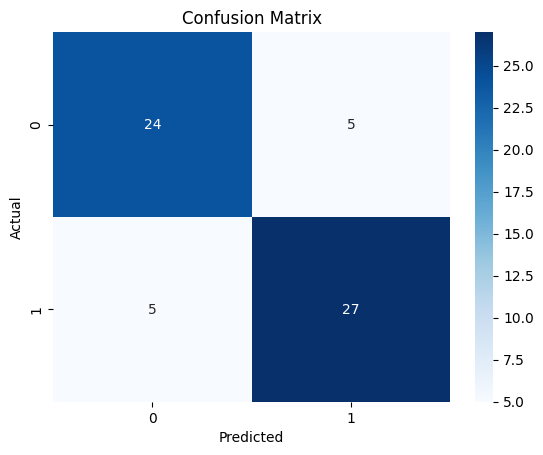

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Concepts of Technology of AI/final assessment/heart.csv')

x = df[random_forest_features]
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

random_forest_model = RandomForestClassifier(random_state=42, max_depth= None, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 50)
random_forest_model.fit(x_train_scaled, y_train)

y_pred = random_forest_model.predict(x_test_scaled)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", confusion)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

vcm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Conclusion


1. Model Performance:  
   - The baseline logistic regression (from scratch and via sklearn) achieved about 80% accuracy with a high recall (0.91) but lower precision (0.77).  
   - The random forest classifier initially performed slightly better at roughly 83.6% accuracy.  
   - After hyperparameter optimization, accuracies improved to approximately 86.9% for logistic regression and 85.3% for random forest.  
   - With feature selection, the logistic regression model’s accuracy further increased to around 88.5%, while the random forest showed modest improvement.

2. Impact of Methods:
   - Cross-Validation & Hyperparameter Tuning: These techniques helped refine the models, yielding better generalization and noticeable gains in accuracy.  
   - Feature Selection: This method was particularly beneficial for logistic regression by eliminating noisy features and enhancing model interpretability, leading to higher accuracy.

3. Insights and Future Directions:
   - The experiment highlights that careful tuning and selecting the most relevant features can substantially boost model performance.  
   - Future work might explore combining models (e.g., ensemble techniques), advanced feature engineering, and testing on larger or more diverse datasets to further improve robustness and predictive power.